In [20]:
import pandas as pd
from datasets import load_dataset
from matplotlib import pyplot as plt
import numpy as np
from ast import literal_eval

In [22]:
lextreme_datasets = ['brazilian_court_decisions_judgment', 'brazilian_court_decisions_unanimity', 'swiss_judgment_prediction', 'german_argument_mining', 'greek_legal_code_volume', 'greek_legal_code_chapter', 'greek_legal_code_subject', 'online_terms_of_service_unfairness_levels', 'online_terms_of_service_clause_topics', 'covid19_emergency_event', 'multi_eurlex_level_1', 'multi_eurlex_level_2', 'multi_eurlex_level_3', 'lener_br', 'legalnero', 'greek_legal_ner', 'mapa_coarse', 'mapa_fine']

In [23]:
def split_into_languages(dataset):
    dataset_new = list()
    
    dataset_df = pd.DataFrame(dataset)
    
    for item in dataset_df.to_dict(orient='records'):
        labels = item['label']
        for language, document in literal_eval(item['input']).items():
            if document is not None:
                item_new = dict()
                item_new['language']=language
                item_new['input']=str(document)
                item_new['label']=labels
                dataset_new.append(item_new)
    
    dataset_new = pd.DataFrame(dataset_new)
    
    dataset_new = Dataset.from_pandas(dataset_new)
    
    return  dataset_new


def create_histogram(dataset_name):
    dataset = load_dataset("joelito/lextreme",dataset_name)

    all_data_as_df = list()

    for split in ['train','validation','test']:
        df = pd.DataFrame(dataset[split])
        all_data_as_df.append(df)
        

    all_data_as_df = pd.concat(all_data_as_df)
    
    if dataset_name.startswith('multi_eurlex'):
        all_data_as_df = split_into_languages(all_data_as_df)
        
    try:
        all_data_as_df['input_split']=all_data_as_df.input.apply(lambda x:str(x).split())
    except:
        all_data_as_df['input_split']=all_data_as_df.input.apply(lambda x:len(x))
    all_data_as_df['input_split_length']=all_data_as_df.input_split.apply(lambda x:len(x))

    plt.figure(figsize=(20,10))
    ax = all_data_as_df.input_split_length.plot.hist(grid=True)
    start, end = ax.get_xlim()
    ax.bis=round(end/20,0)
    ax.xaxis.set_ticks(np.arange(0, end, round(end/20,0)))
    plt.xlabel('Length of input', fontsize=16)
    plt.ylabel('Frequency of length value', fontsize=16)
    plt.title(dataset_name, fontsize=16)
    plt.savefig('histogram_'+'_'.join(dataset_name.split())+'.jpg')


Reusing dataset lextreme (C:\Users\vmatoshi\.cache\huggingface\datasets\joelito___lextreme\brazilian_court_decisions_judgment\1.0.0\14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (C:\Users\vmatoshi\.cache\huggingface\datasets\joelito___lextreme\brazilian_court_decisions_unanimity\1.0.0\14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (C:\Users\vmatoshi\.cache\huggingface\datasets\joelito___lextreme\swiss_judgment_prediction\1.0.0\14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (C:\Users\vmatoshi\.cache\huggingface\datasets\joelito___lextreme\german_argument_mining\1.0.0\14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (C:\Users\vmatoshi\.cache\huggingface\datasets\joelito___lextreme\greek_legal_code_volume\1.0.0\14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (C:\Users\vmatoshi\.cache\huggingface\datasets\joelito___lextreme\greek_legal_code_chapter\1.0.0\14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (C:\Users\vmatoshi\.cache\huggingface\datasets\joelito___lextreme\greek_legal_code_subject\1.0.0\14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (C:\Users\vmatoshi\.cache\huggingface\datasets\joelito___lextreme\online_terms_of_service_unfairness_levels\1.0.0\14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (C:\Users\vmatoshi\.cache\huggingface\datasets\joelito___lextreme\online_terms_of_service_clause_topics\1.0.0\14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (C:\Users\vmatoshi\.cache\huggingface\datasets\joelito___lextreme\covid19_emergency_event\1.0.0\14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split:   0%|          | 0/55000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset multi_eurlex downloaded and prepared to C:\Users\vmatoshi\.cache\huggingface\datasets\multi_eurlex\all_languages\1.0.0\8ec8b79877a517369a143ead6679d1788d13e51cf641ed29772f4449e8364fb6. Subsequent calls will reuse this data.


Generating validation split: 0 examples [00:00, ? examples/s]

Reusing dataset multi_eurlex (C:\Users\vmatoshi\.cache\huggingface\datasets\multi_eurlex\all_languages\1.0.0\8ec8b79877a517369a143ead6679d1788d13e51cf641ed29772f4449e8364fb6)


Generating test split: 0 examples [00:00, ? examples/s]

Reusing dataset multi_eurlex (C:\Users\vmatoshi\.cache\huggingface\datasets\multi_eurlex\all_languages\1.0.0\8ec8b79877a517369a143ead6679d1788d13e51cf641ed29772f4449e8364fb6)


Dataset lextreme downloaded and prepared to C:\Users\vmatoshi\.cache\huggingface\datasets\joelito___lextreme\multi_eurlex_level_1\1.0.0\14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

NameError: name 'literal_eval' is not defined

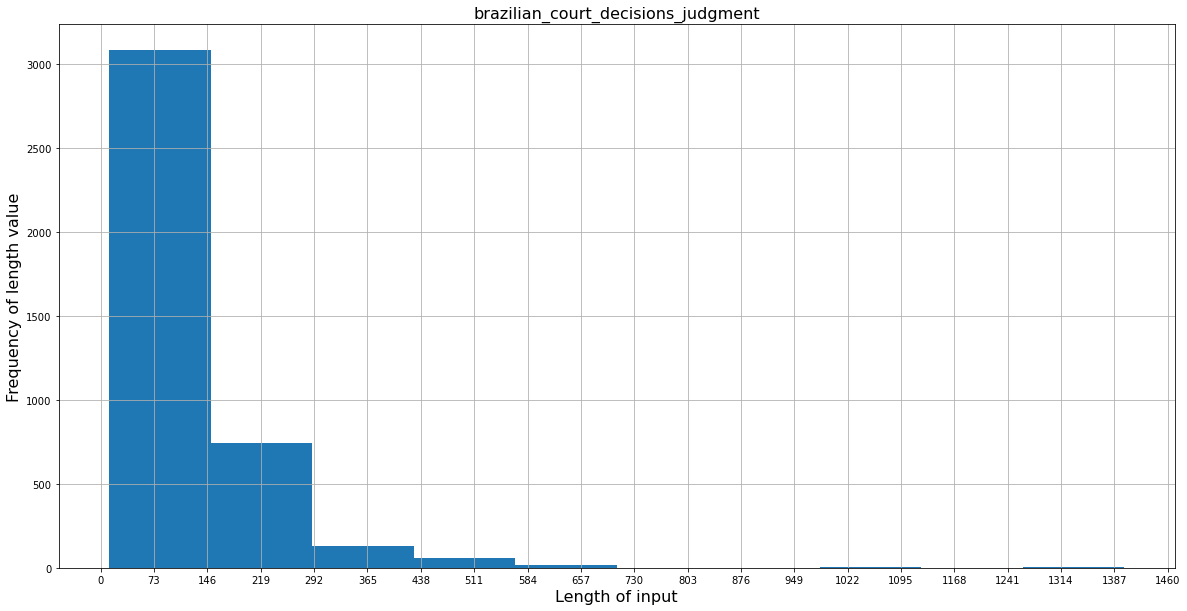

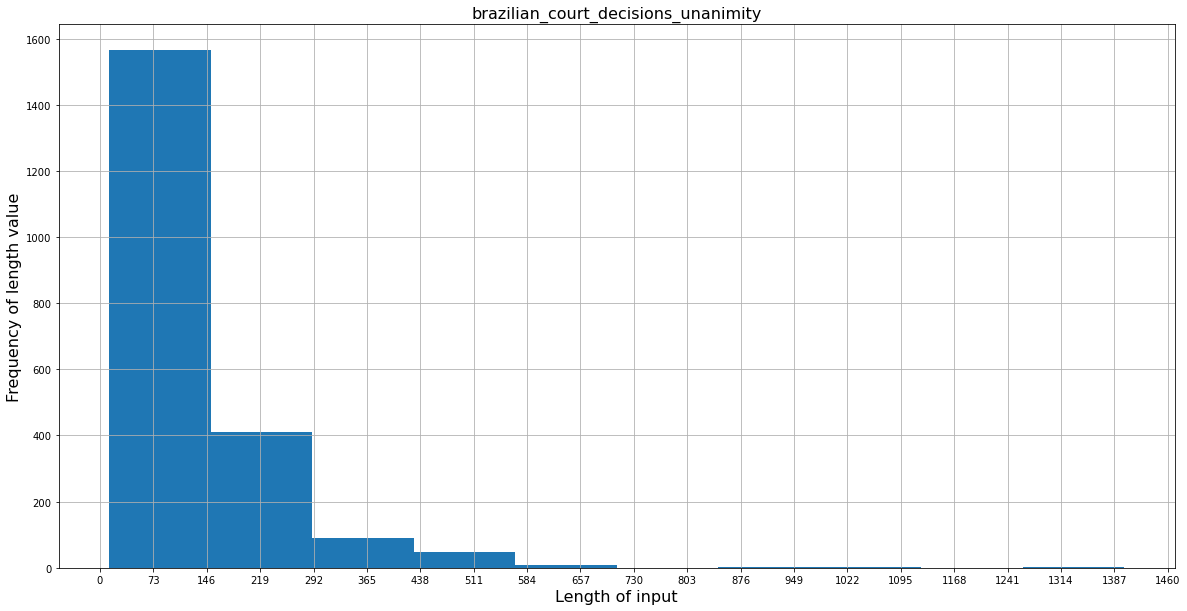

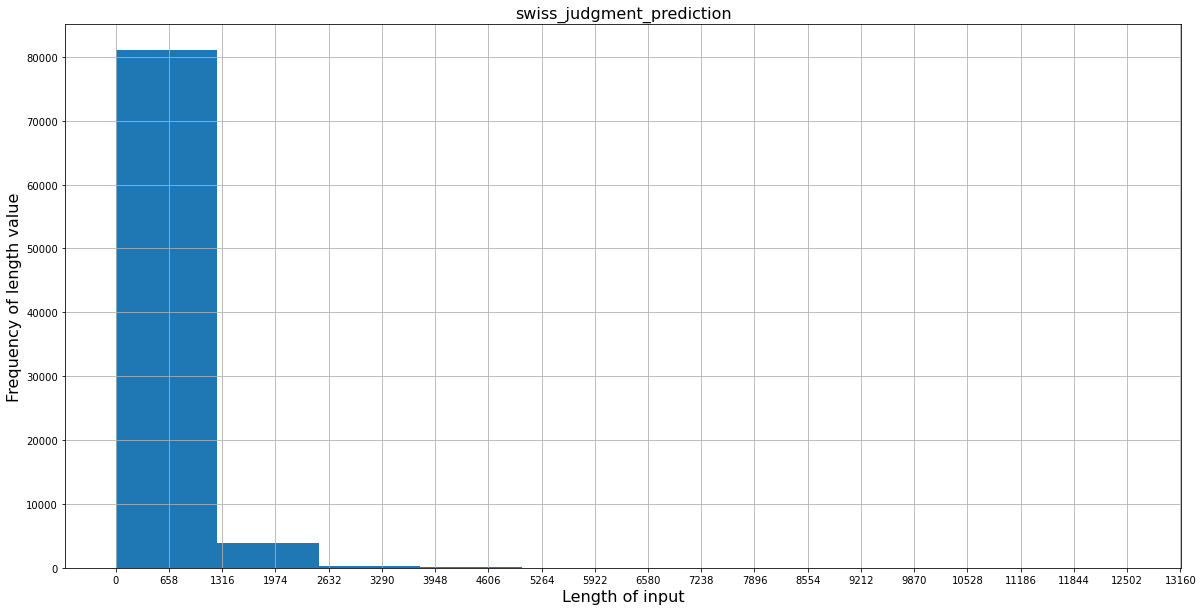

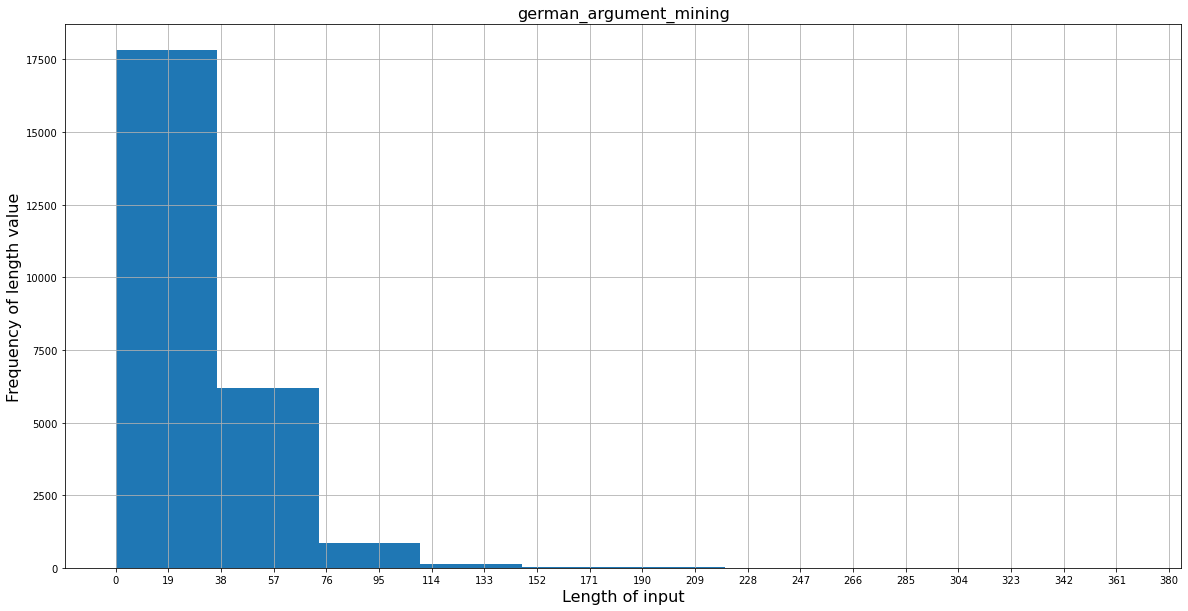

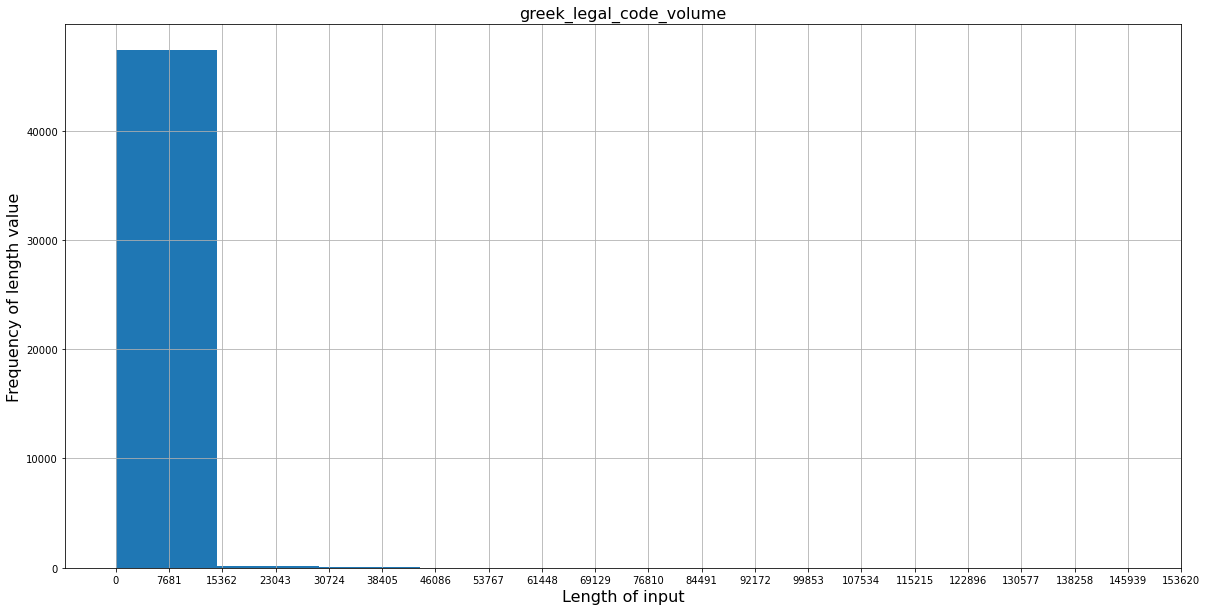

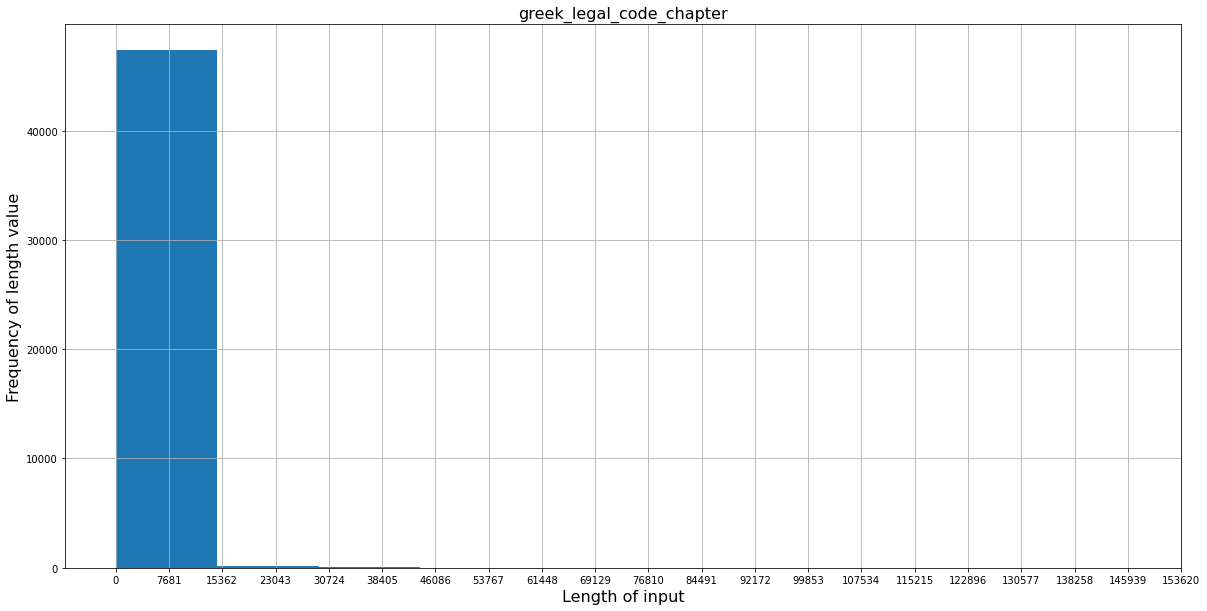

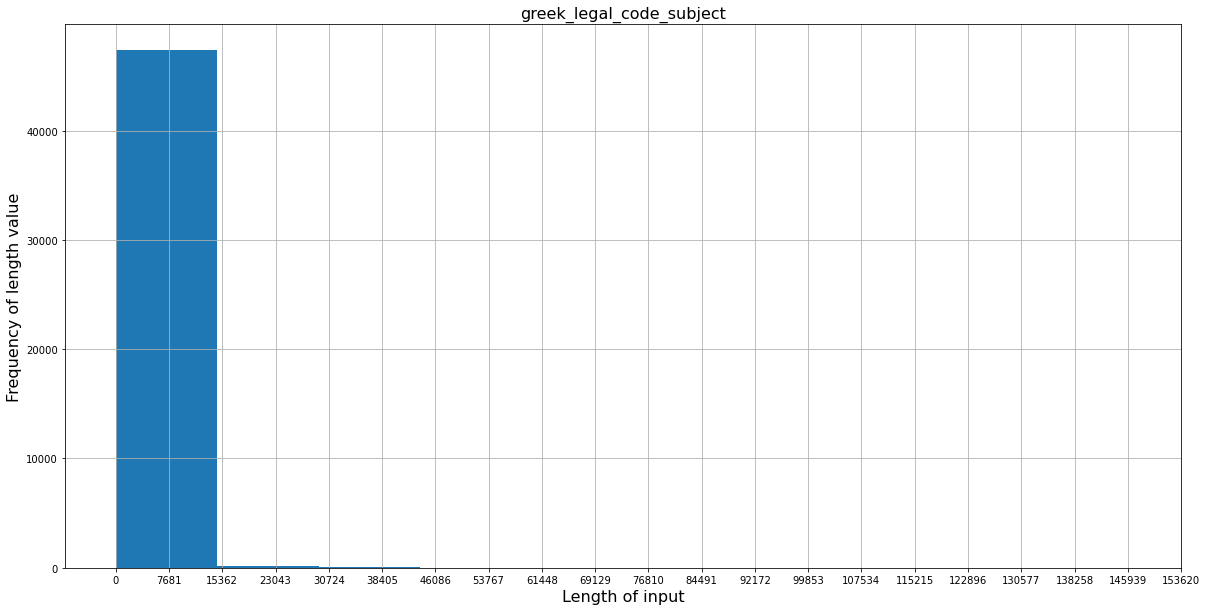

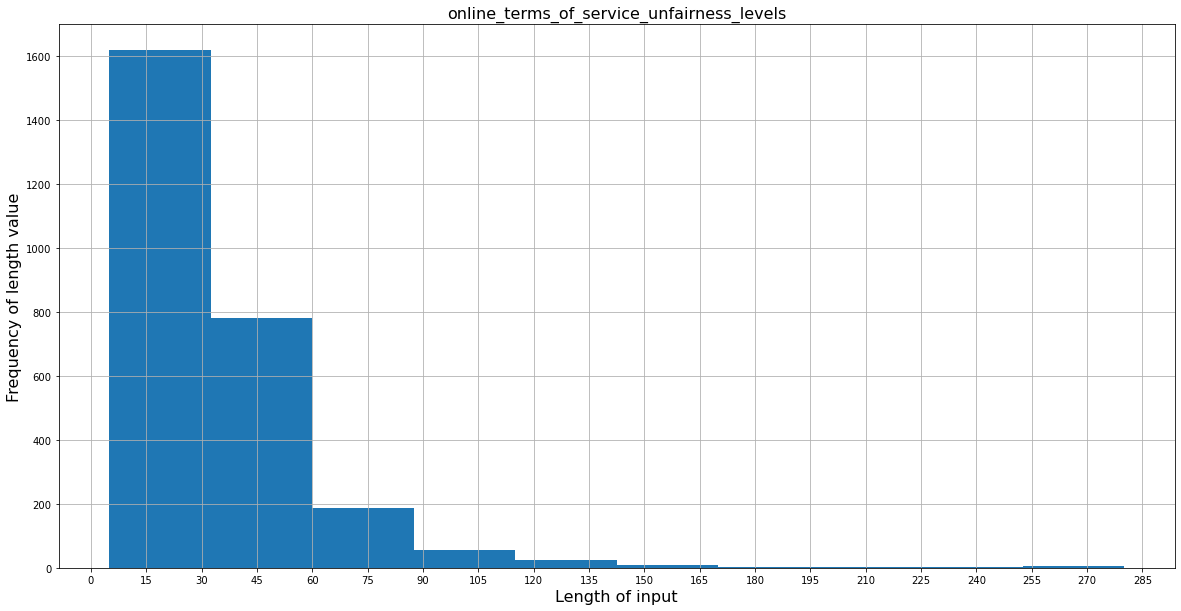

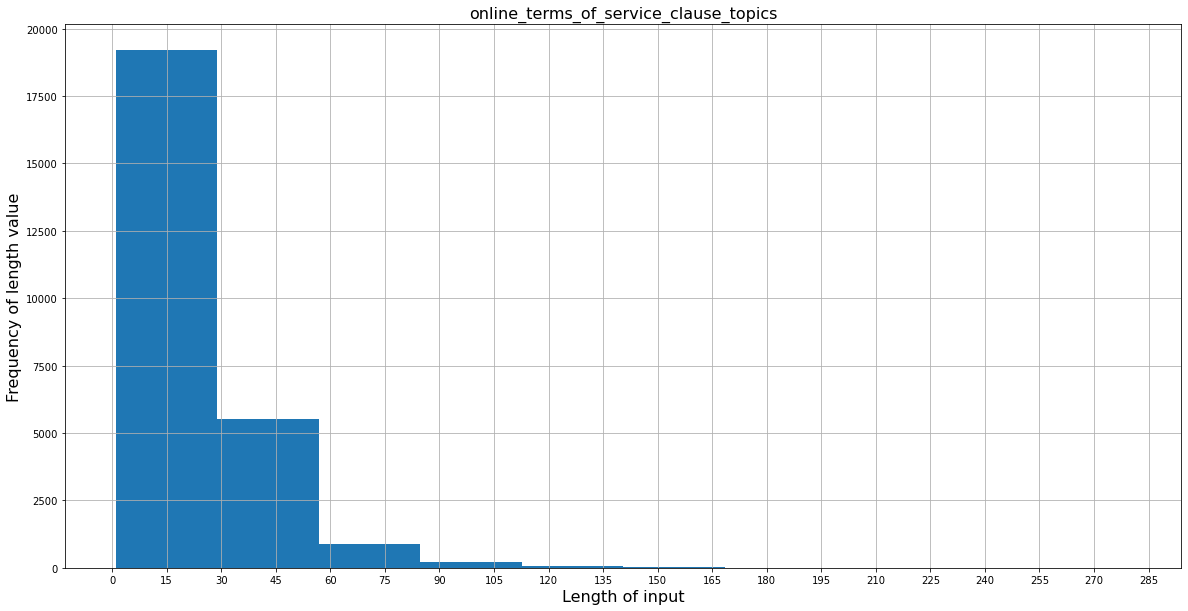

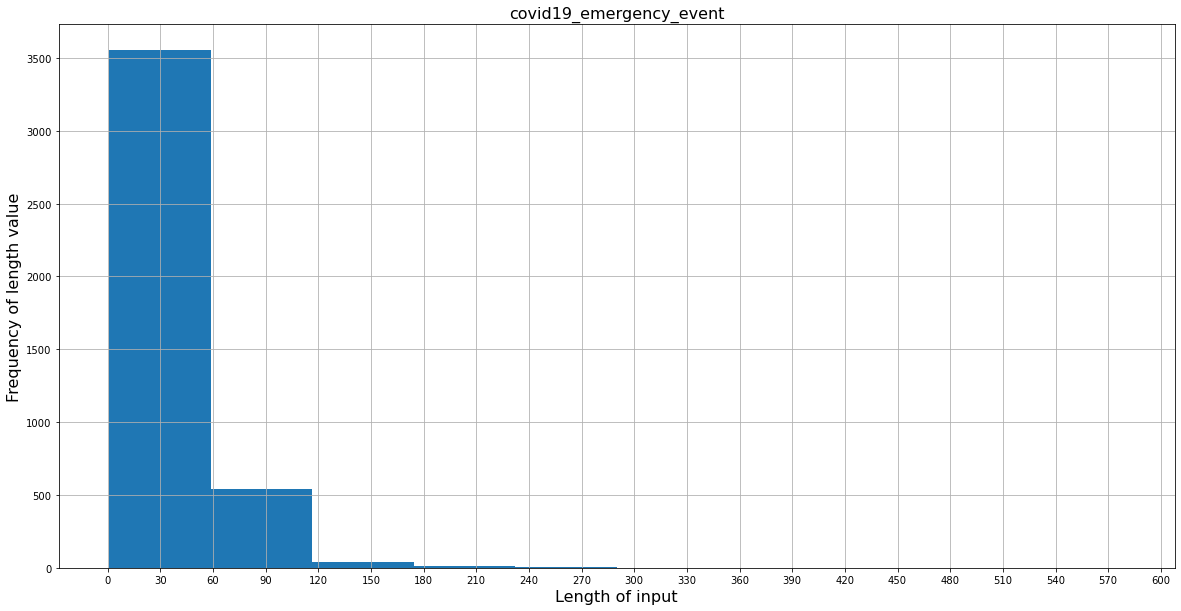

In [25]:
for ds in lextreme_datasets:
    create_histogram(ds)